<a href="https://colab.research.google.com/github/hyperkraz/MAT421/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW 2

***Problem 1***

In [50]:
def my_lin_interp(x_arr, y_arr, x_value):
  print("The formula is: y(X) = y1 + [(y2 - y1) / (x2 - x1)]*(X - x1) where x1 -> xi and y1 -> yi and x2 -> xi + 1 and y2 -> yi + 1")
  x = x_arr
  y1 = y_arr
  y = x_value
  j = 0
  listlength = len(x)
  print(listlength)
  print(x[0:1])
  print(x[1:2])

  for m in range(listlength):
    if j + 1 == listlength:
      break
    if x[j] < y and y < x[j + 1]:
      print("The number is in range of {} and {}, so it is between index {} and {}".format(x[j], x[j + 1], j, j + 1))
      print("These are the x1 and x2 values, so we pick up corresponding y1 and y2 values from list y")
      print(y1[j])
      print(y1[j + 1])
      intervals = zip(x_arr, x_arr[1:], y_arr, y_arr[1:])
      for v in intervals:print(v)
      return x[j], x[j + 1], y1[j], y1[j + 1]
    else:
      print("The number is not in range of {} and {}".format(x[j], x[j + 1]))
    j += 1

x_arr, y_arr = [1, 2.5, 3.4, 5.8, 6], [2, 4, 5.8, 4.3, 4]
x_value = 3
x1, x2, y1, y2 = my_lin_interp(x_arr, y_arr, x_value)
print(x1, x2, y1, y2)
slope = (y2 - y1) / (x2 - x1)
print(slope)
y_x_value = y1 + slope*(x_val - x1)
print("The interpolation at x equals 3 is:", y_x_value)


The formula is: y(X) = y1 + [(y2 - y1) / (x2 - x1)]*(X - x1) where x1 -> xi and y1 -> yi and x2 -> xi + 1 and y2 -> yi + 1
5
[1]
[2.5]
The number is not in range of 1 and 2.5
The number is in range of 2.5 and 3.4, so it is between index 1 and 2
These are the x1 and x2 values, so we pick up corresponding y1 and y2 values from list y
4
5.8
(1, 2.5, 2, 4)
(2.5, 3.4, 4, 5.8)
(3.4, 5.8, 5.8, 4.3)
(5.8, 6, 4.3, 4)
2.5 3.4 4 5.8
2.0
The interpolation at x equals 3 is: 5.0


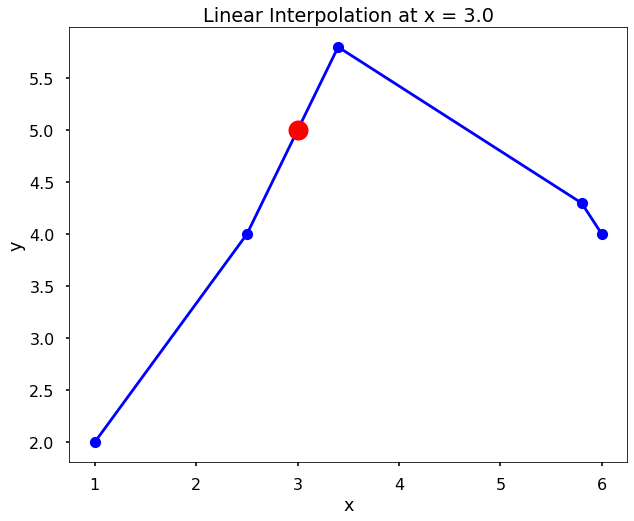

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.plot(x_arr, y_arr, '-ob')
plt.plot(3.0, y_x_value, 'ro', markersize=20)
plt.title('Linear Interpolation at x = 3.0')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

***Problem 2***

In [52]:
import numpy as np
def my_cubic_spline(x_array, y_array, x_value):
  x = x_array
  yl = y_array
  y = x_value
  j = 0
  listlength = len(x)
  print(listlength)
  print(x[0:1])
  print(x[1:2])
  answer = np.array([1, 2, 0, 0, 0])
  answer = answer[:, np.newaxis]
  print(answer)
  cubic = np.array([[1, 1, 0, 0, 0], [0, 0, 1, 1, 1], [1, 3, -1, 0, 0], [0, 3, 0, -1, 0], [0, 0, 0, 2, 6]])
  array = np.dot(np.linalg.inv(cubic), answer)
  print(array)
  print("a0 = 0, a1 = 3, c0 = 0, b0 = {}, d0 = {}, b1 = {}, c1 = {}, d1 = {}".format(array[0], array[1], array[2], array[3], array[4]))

  s0 = 2 + array[0]*(1.5 - 1) + 0*(1.5 - 1)**2+array[1]*(1.5 - 1)**3

  s1 = 3 + array[2]*(1.5 - 1) + array[3]*(1.5 - 1)**2 + array[4]*(1.5 - 1)**3

  print("x = 1.5 lies between [1, 2], so y is between [2, 3] and thus cubic interpolation is:", s0)

  return answer, s0

x_array, y_array = [1, 2, 3], [2, 3, 5]

x_value = 1.5

solution, s0 = my_cubic_spline(x_array, y_array, x_value)

print("Therefore the cubic spline interpolation at x equals 1.5 is:", s0)


3
[1]
[2]
[[1]
 [2]
 [0]
 [0]
 [0]]
[[ 0.75]
 [ 0.25]
 [ 1.5 ]
 [ 0.75]
 [-0.25]]
a0 = 0, a1 = 3, c0 = 0, b0 = [0.75], d0 = [0.25], b1 = [1.5], c1 = [0.75], d1 = [-0.25]
x = 1.5 lies between [1, 2], so y is between [2, 3] and thus cubic interpolation is: [2.40625]
Therefore the cubic spline interpolation at x equals 1.5 is: [2.40625]


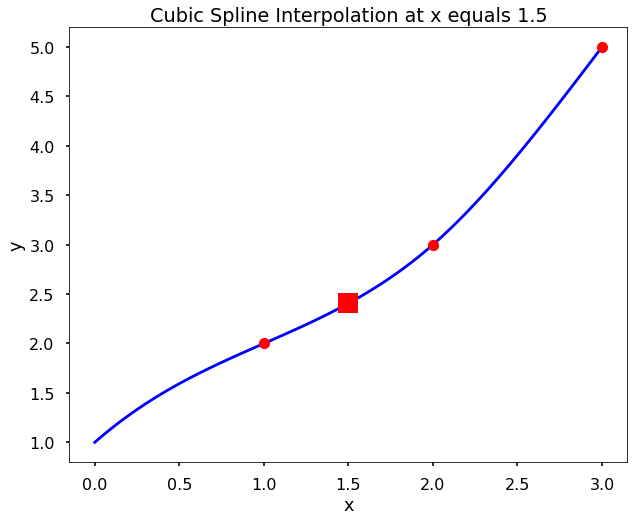

In [53]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
x_array, y_array = [1, 2, 3], [2, 3, 5]
x_value = 1.5
f = CubicSpline(x_array, y_array, bc_type='natural')
x_new = np.linspace(0, 3, 100)
y_new = f(x_new)
plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(x_array, y_array, 'ro')
plt.plot(1.5, s0, 'rs', markersize=20)
plt.title('Cubic Spline Interpolation at x equals 1.5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

 -